In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import glob

In [2]:
dirty_dataframe = pd.read_csv('G:\\Google Case Study\\Merged Data\\all_data.csv')
dirty_dataframe

C:\Users\14194\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual
3489744,3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member
3489745,3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member
3489746,3489746,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member


In [3]:
dirty_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 372.7+ MB


# Since we need to calculate the ride_length we have to first convert the str datetime to python datetime object.
## Below I have converted started_at & ended_at columns so that we can find out the duration of each ride.

In [4]:
dirty_dataframe['started_at'] = pd.to_datetime(dirty_dataframe['started_at'],dayfirst=True)
dirty_dataframe['ended_at'] = pd.to_datetime(dirty_dataframe['ended_at'],dayfirst=True)

In [5]:
dirty_dataframe['ride_length'] = (dirty_dataframe['ended_at']-dirty_dataframe['started_at'])
dirty_dataframe

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51
3489744,3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27
3489745,3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35
3489746,3489746,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:06:40


## Now I will make columns to determine which day and which month the ride was taken place.

In [80]:
dirty_dataframe['day of the week'] = dirty_dataframe['started_at'].dt.dayofweek
dirty_dataframe['Month'] = pd.to_datetime(dirty_dataframe['started_at']).dt.strftime('%B %Y')
dirty_dataframe

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,Sunday,April 2020,6
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09,Friday,April 2020,4
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23,Wednesday,April 2020,2
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12,Tuesday,April 2020,1
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55,Saturday,April 2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51,Saturday,March 2021,5
3489744,3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27,Tuesday,March 2021,1
3489745,3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35,Tuesday,March 2021,1
3489746,3489746,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:06:40,Monday,March 2021,0


## After adding necessary columns which will be helpful for our further analysis. I will check if the dataset contains any missing values.

In [89]:
dirty_dataframe.isnull().sum()   

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id      122801
end_station_name      143242
end_station_id        143703
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
ride_length                0
Day_of_the_Week            0
Month                      0
day of the week            0
dtype: int64

In [90]:
rows_with_null_val = dirty_dataframe.isnull().any(axis=1).sum()
print(f"Total number of null rows: {rows_with_null_val}")

Total number of null rows: 195057


## Since there are 195057 rows with missing values. I will calculate how much of those are contributing in the total dataset.

In [91]:
percentage_of_null_rows = (rows_with_null_val)/dirty_dataframe.shape[0]*100
print(f"The null rows are contributing {percentage_of_null_rows} % in the dataset")

The null rows are contributing 5.589429380001078 % in the dataset


## Since the null rows are contributing roughly 5.5% I will drop them for a cleaner dataset.

In [18]:
#Checking to see if the new dataset has any missing values.
#clean_dataset = dirty_dataframe.dropna(axis='index')
print(clean_dataset.isnull().sum())

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
Day_of_the_Week       0
Month                 0
day of the week       0
dtype: int64


In [19]:
clean_dataset.head(10)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,Sunday,April,6
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,Friday,April,4
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,Wednesday,April,2
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,Tuesday,April,1
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,Saturday,April,5
5,5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.6120,member,0 days 00:05:24,Thursday,April,3
6,6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.6120,41.8957,-87.6201,member,0 days 00:05:13,Thursday,April,3
7,7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual,0 days 01:15:49,Tuesday,April,1
8,8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual,0 days 00:05:44,Wednesday,April,2
9,9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member,0 days 00:17:19,Saturday,April,5


In [20]:
#Some unusual index column is seems to be appearing in the dataset so I will tweak it a bit.
clean_dataset = clean_dataset.iloc[:,1:]
clean_dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,Sunday,April,6
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09,Friday,April,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23,Wednesday,April,2
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12,Tuesday,April,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55,Saturday,April,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489742,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,0 days 01:13:31,Sunday,March,6
3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51,Saturday,March,5
3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27,Tuesday,March,1
3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35,Tuesday,March,1


# For better understanding of the dataset let's take a look at the description.

In [21]:
description = clean_dataset.describe()
print(description)

          start_lat     start_lng       end_lat       end_lng  \
count  3.294691e+06  3.294691e+06  3.294691e+06  3.294691e+06   
mean   4.190501e+01 -8.764443e+01  4.190527e+01 -8.764472e+01   
std    4.161361e-02  2.437207e-02  4.172347e-02  2.450272e-02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01   
25%    4.188307e+01 -8.765814e+01  4.188316e+01 -8.765860e+01   
50%    4.190022e+01 -8.764117e+01  4.190070e+01 -8.764170e+01   
75%    4.192957e+01 -8.762773e+01  4.193120e+01 -8.762775e+01   
max    4.206490e+01 -8.752823e+01  4.206501e+01 -8.752823e+01   

                     ride_length  day of the week  
count                    3294691     3.294691e+06  
mean   0 days 00:25:13.372466188     3.245439e+00  
std    0 days 06:21:05.661393723     1.980589e+00  
min           -21 days +19:50:02     0.000000e+00  
25%              0 days 00:08:02     2.000000e+00  
50%              0 days 00:14:42     3.000000e+00  
75%              0 days 00:26:52     5.000000e+00 

## The description shows that some values in ride length are negative which cannot be possible. Let's address that. 

In [23]:
# Firstly, I will transform the format of the data into minutes.
ride_length = clean_dataset["ended_at"] - clean_dataset["started_at"]
ride_length = np.round(ride_length.dt.total_seconds()/60,2)
clean_dataset["ride_length"] = ride_length
clean_dataset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.82,Sunday,April,6
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.15,Friday,April,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.38,Wednesday,April,2
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.20,Tuesday,April,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.92,Saturday,April,5


In [24]:
# Now I have to find all the negative values in the ride_length and filter them out.
negative_ride_length = clean_dataset[clean_dataset['ride_length']<0]
negative_ride_length

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week
2422,7C1E92200AEFF70E,docked_bike,2020-04-27 17:20:30,2020-04-27 17:20:18,St. Clair St & Erie St,211,Clinton St & Washington Blvd,91.0,41.894400,-87.622700,41.883400,-87.641200,member,-0.20,Monday,April,0
2504,671BB1F73F4CD303,docked_bike,2020-04-20 16:51:18,2020-04-20 16:51:05,Lake Shore Dr & Belmont Ave,334,Buckingham Fountain,2.0,41.940800,-87.639200,41.876500,-87.620500,casual,-0.22,Monday,April,0
3136,502B972C6B1FCAE6,docked_bike,2020-04-12 19:09:54,2020-04-12 19:09:40,Clark St & Schiller St,301,Wells St & Concord Ln,289.0,41.908000,-87.631500,41.912100,-87.634700,member,-0.23,Sunday,April,6
3542,68E70FDF06F0A439,docked_bike,2020-04-29 17:37:11,2020-04-29 17:37:07,Dearborn St & Adams St,37,California Ave & 23rd Pl,442.0,41.879400,-87.629800,41.849100,-87.695100,member,-0.07,Wednesday,April,2
8212,6EB323BCC83A9D1D,docked_bike,2020-04-05 15:46:12,2020-04-05 15:46:11,Francisco Ave & Foster Ave,471,Damen Ave & Clybourn Ave,163.0,41.975600,-87.701400,41.931900,-87.677900,member,-0.02,Sunday,April,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113600,7074FF42B83EC6AD,docked_bike,2020-12-15 11:50:14,2020-11-25 13:42:44,Peoria St & Jackson Blvd,13158,Clinton St & Madison St,TA1305000032,41.877641,-87.649617,41.882242,-87.641066,member,-28687.50,Tuesday,December,1
3114153,7BD7B9F52607DAB3,electric_bike,2020-12-15 11:53:44,2020-11-25 14:50:00,Pine Grove Ave & Irving Park Rd,TA1308000022,Broadway & Barry Ave,13137,41.954360,-87.648028,41.937716,-87.644179,member,-28623.73,Tuesday,December,1
3114590,70F458C5AAE4C49F,docked_bike,2020-12-15 12:02:17,2020-11-25 18:03:18,Pine Grove Ave & Irving Park Rd,TA1308000022,Pine Grove Ave & Irving Park Rd,TA1308000022,41.954383,-87.648043,41.954383,-87.648043,member,-28438.98,Tuesday,December,1
3300569,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.956133,-87.668981,41.956143,-87.668985,member,-0.02,Monday,March,0


# As seen above there are 10454 rows with negative values.

In [25]:
clean_dataset = clean_dataset[clean_dataset['ride_length']>0]

# Double check to see if there are negative values.

In [26]:
negative_ride_length = clean_dataset[clean_dataset['ride_length']<0]
negative_ride_length

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Day_of_the_Week,Month,day of the week


In [27]:
#Lets check out the description of our cleaned dataset.
description = clean_dataset.describe()
print(description)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  3.283948e+06  3.283948e+06  3.283948e+06  3.283948e+06  3.283948e+06   
mean   4.190501e+01 -8.764444e+01  4.190526e+01 -8.764472e+01  2.805185e+01   
std    4.162321e-02  2.437939e-02  4.173048e-02  2.450881e-02  2.590456e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01  2.000000e-02   
25%    4.188307e+01 -8.765814e+01  4.188316e+01 -8.765860e+01  8.080000e+00   
50%    4.190022e+01 -8.764117e+01  4.190070e+01 -8.764170e+01  1.477000e+01   
75%    4.192957e+01 -8.762773e+01  4.193120e+01 -8.762775e+01  2.692000e+01   
max    4.206490e+01 -8.752823e+01  4.206501e+01 -8.752823e+01  5.872003e+04   

       day of the week  
count     3.283948e+06  
mean      3.245357e+00  
std       1.980669e+00  
min       0.000000e+00  
25%       2.000000e+00  
50%       3.000000e+00  
75%       5.000000e+00  
max       6.000000e+00  


# The above description shows that the mean of the ride length column is = 28.05, the max = 58720 and the min = 0.02 minutes respectively.

# Let's analyze our clean data to get the insights about members and casual riders.

### Pie-chart will give us the idea about the distribution of each type of rider in this dataset.

In [30]:
#Total riders
total_riders = clean_dataset['member_casual'].value_counts()
total_riders

member    1936040
casual    1347908
Name: member_casual, dtype: int64

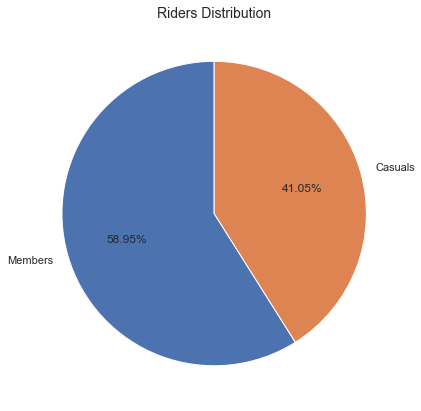

In [32]:
sns.set()
plt.figure(figsize=(9,7))
labels = ['Members','Casuals']
plt.pie(x=total_riders,autopct='%.2f%%',labels=labels,startangle=90)
plt.title("Riders Distribution", fontsize = 14, loc = 'center')
plt.show()

# Clearly the pie-chart shows us that there are more members than casual riders.

## Another interesting fact we can calculate is that the average distance or ride lengths for members and casual riders 

In [40]:
members_ = clean_dataset[clean_dataset['member_casual']=='member']
casual_ = clean_dataset[clean_dataset['member_casual']=='casual']

In [41]:
print("Summary of the members: ")
print('\n')
print(members_['ride_length'].describe())
print('\n')
print("Summary of the casual: ")
print('\n')
print(casual_['ride_length'].describe())

Summary of the members: 


count    1.936040e+06
mean     1.593462e+01
std      9.353875e+01
min      2.000000e-02
25%      6.620000e+00
50%      1.160000e+01
75%      2.018000e+01
max      5.872003e+04
Name: ride_length, dtype: float64


Summary of the casual: 


count    1.347908e+06
mean     4.545617e+01
std      3.878248e+02
min      2.000000e-02
25%      1.187000e+01
50%      2.163000e+01
75%      4.098000e+01
max      5.568388e+04
Name: ride_length, dtype: float64


## From the above summary, we can clearly see that the average duration of a ride for casual riders is more than that of members. So even though the number of members is higher than the casual riders, the casual riders ride longer.

# Let's calculate the usage of each type of riders in every month.

In [68]:
group_members_casuals = clean_dataset.groupby('Month')['ride_length'].describe()
group_members_casuals

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,84620.0,35.609914,567.759345,0.02,8.75,16.37,28.03,58720.03
August,605652.0,29.459332,243.444049,0.02,8.83,15.95,28.68,40846.37
December,113539.0,15.642172,74.598329,0.02,5.82,9.83,17.40,9740.98
February,42994.0,21.263072,232.421759,0.02,6.62,11.07,19.60,30129.23
January,83508.0,14.553498,84.151315,0.02,5.65,9.33,16.22,19825.92
July,548617.0,37.960022,384.316689,0.02,9.98,17.95,31.90,49965.45
June,342040.0,33.291685,247.044384,0.02,10.20,18.17,30.83,41271.00
March,205687.0,22.791037,159.662792,0.02,6.95,12.47,23.32,31681.65
May,199772.0,33.050785,154.639819,0.02,10.52,19.48,32.55,28896.88


<Figure size 1080x504 with 0 Axes>

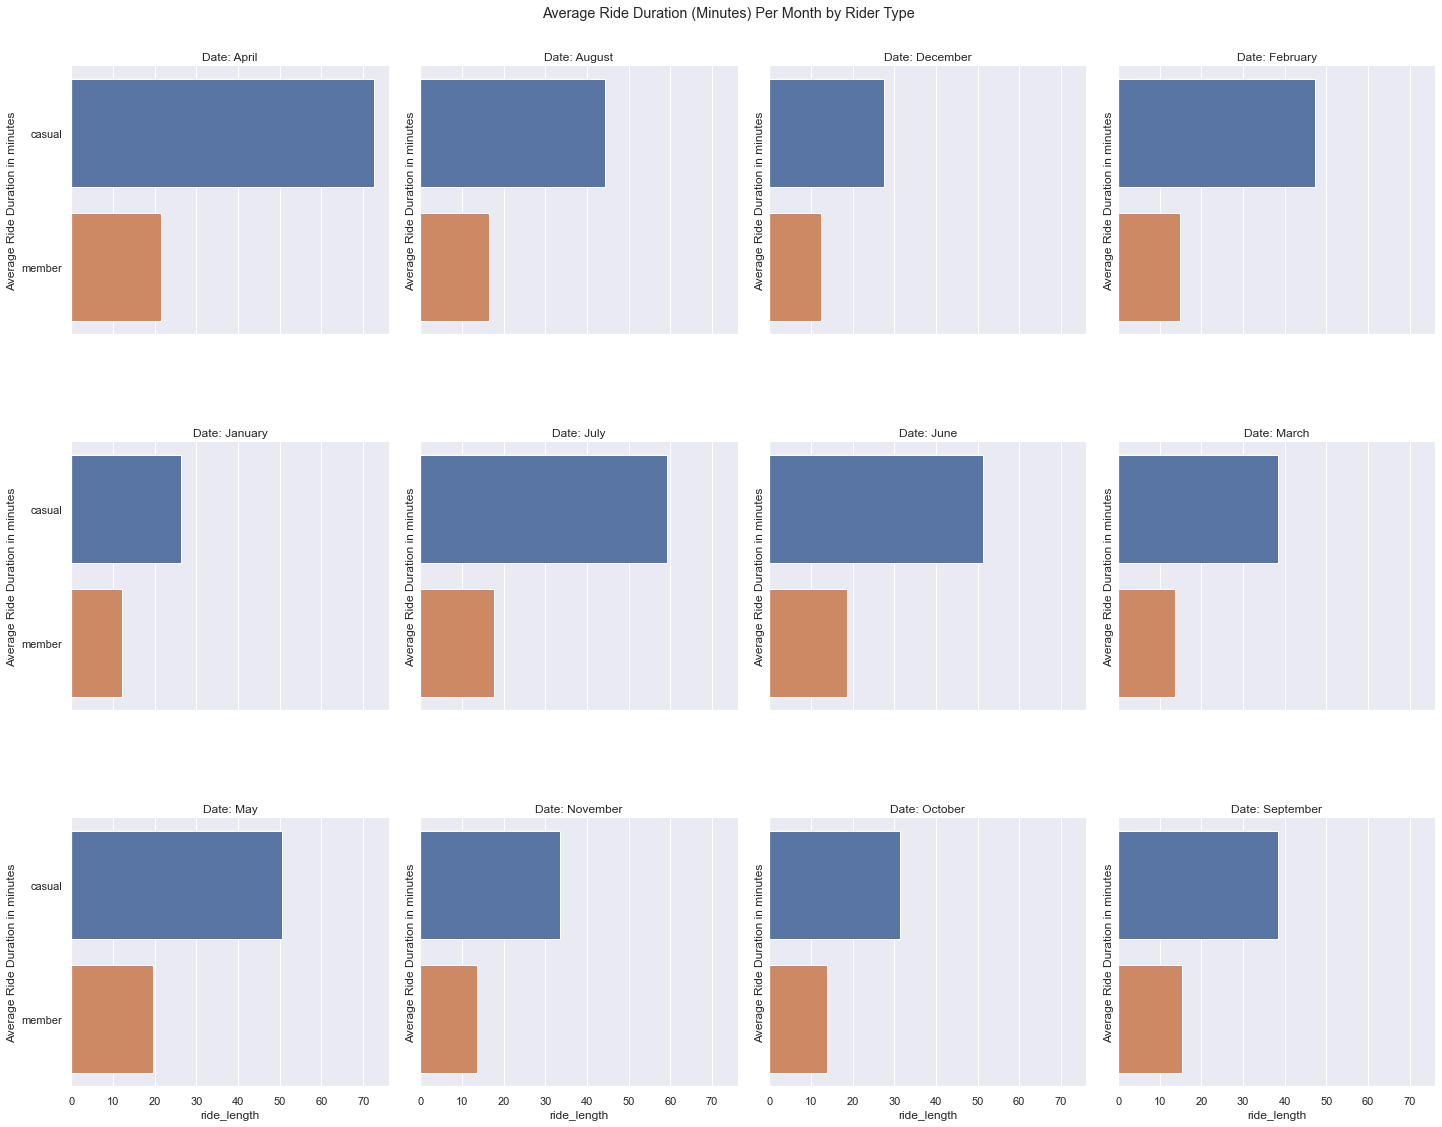

In [95]:
group_members_casuals = clean_dataset.groupby(['Month', 'member_casual'], as_index = False)['ride_length']
avg_ride = group_members_casuals.apply(lambda x : np.mean(x))
ride_avg_df = pd.DataFrame(avg_ride)
ride_avg_df = ride_avg_df.sort_values(by='Month')

sns.set_style("darkgrid")

plt.figure(figsize=[15,7])
ride_duration = sns.catplot(
    x = 'ride_length', 
    y = 'member_casual',
    data = ride_avg_df, 
    col = 'Month',
    col_wrap = 4,
    kind = 'bar')

ride_duration.set(
    ylabel = "Average Ride Duration in minutes"
)

ride_duration.fig.suptitle('Average Ride Duration (Minutes) Per Month by Rider Type',  y = 1.03)
ride_duration.set_titles("Date: {col_name}")
plt.subplots_adjust(hspace=0.4, wspace=0.1)

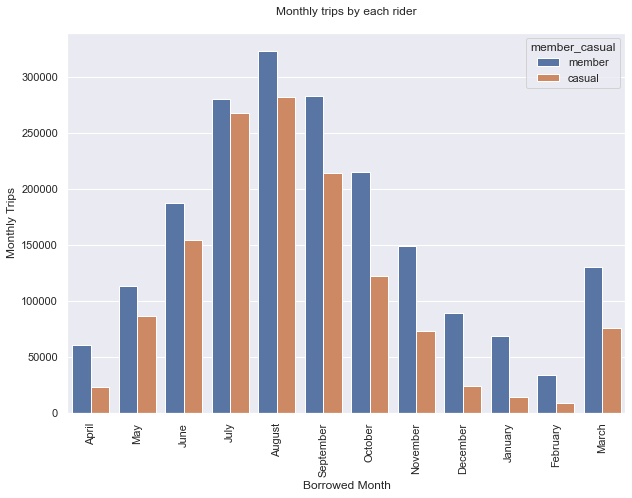

In [112]:
rider_type = clean_dataset.groupby('Month')['member_casual'].describe()

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize = fig_dims)

ride_p = sns.countplot(
    data = clean_dataset,
    x = 'Month',
    hue = 'member_casual',
    ax = ax
)

ride_p.set(xlabel = 'Borrowed Month', ylabel = 'Monthly Trips')
ride_p.set_title('Monthly trips by each rider',  y = 1.03)
plt.xticks(rotation = 90)
plt.show();

# From the above visualization we clearly see that bikes utilization from february till september is the highest.

# Now I will see on which day of the week the bikes are getting utilized the most.

[Text(0.5, 0, 'Day of rental'), Text(0, 0.5, 'Total renters')]

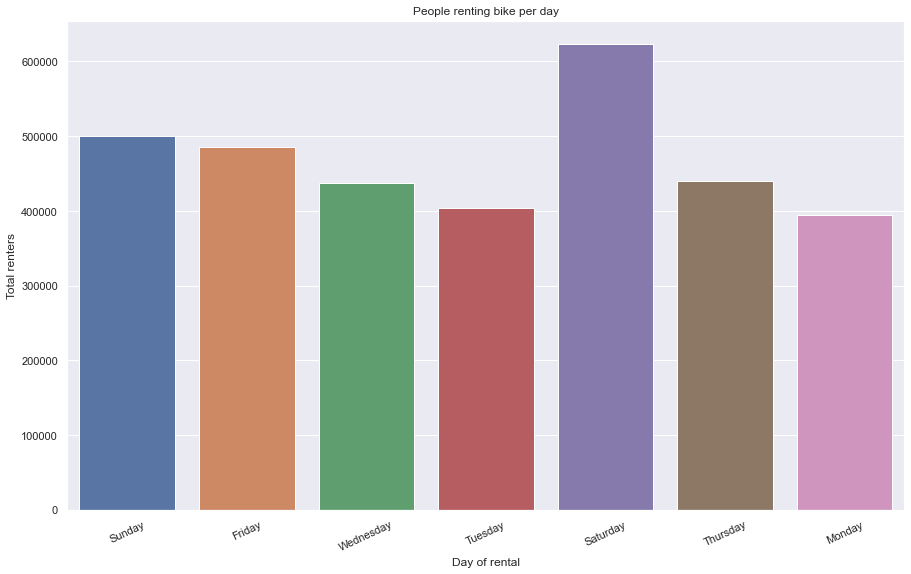

In [101]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)

rental_day = sns.countplot(
    data = clean_dataset,
    x = 'Day_of_the_Week',
    ax = ax
)

rental_day.set_title('People renting bike per day')
plt.xticks(rotation = 25)
rental_day.set(xlabel = 'Day of rental', ylabel = 'Total renters')

# Similarly we can make bar chart of members and casuals to see when they rent a bike.

[Text(0.5, 0, 'Day of rental'), Text(0, 0.5, 'Total rented bikes')]

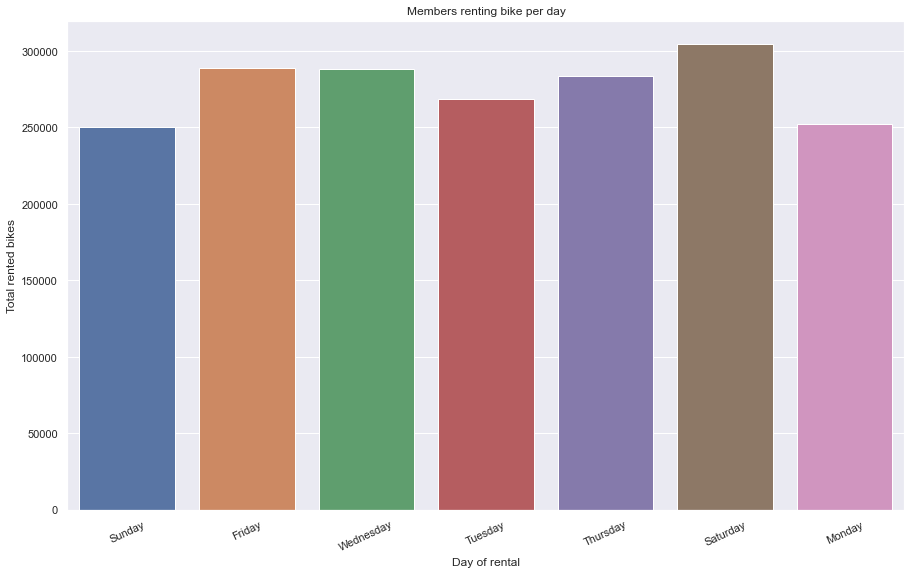

In [102]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)

rental_day = sns.countplot(
    data = members_,
    x = 'Day_of_the_Week',
    ax = ax
)

rental_day.set_title('Members renting bike per day')
plt.xticks(rotation = 25)
rental_day.set(xlabel = 'Day of rental', ylabel = 'Total rented bikes')

# Above bar chart clearly shows us that members rent the bikes almost everyday but especially on a saturday the number of rentals is high.

[Text(0.5, 0, 'Day of rental'), Text(0, 0.5, 'Total rented bikes')]

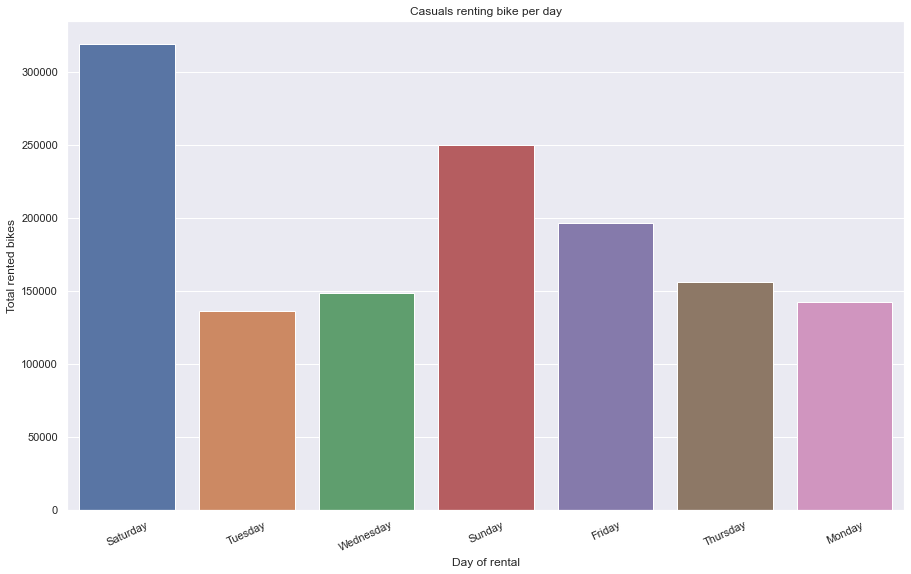

In [103]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)

rental_day = sns.countplot(
    data = casual_,
    x = 'Day_of_the_Week',
    ax = ax
)

rental_day.set_title('Casuals renting bike per day')
plt.xticks(rotation = 25)
rental_day.set(xlabel = 'Day of rental', ylabel = 'Total rented bikes')

# Casuals rent the bikes majorly on weekends 

# Let's check on which locations mostly the bikes are getting rented.

In [106]:
Top_10_locations = clean_dataset['start_station_name'].value_counts().head(10)
print('Starting locations: ',Top_10_locations)
print('\n')
Top_10_locations = clean_dataset['start_station_name'].value_counts().head(10)
print('Ended at locations: ',Top_10_locations)

Starting locations:  Streeter Dr & Grand Ave       34904
Clark St & Elm St             31818
Lake Shore Dr & Monroe St     29480
Theater on the Lake           29347
Lake Shore Dr & North Blvd    26725
Wells St & Concord Ln         24713
Indiana Ave & Roosevelt Rd    24065
Millennium Park               24025
Broadway & Barry Ave          23686
Dearborn St & Erie St         23536
Name: start_station_name, dtype: int64


Ended at locations:  Streeter Dr & Grand Ave       34904
Clark St & Elm St             31818
Lake Shore Dr & Monroe St     29480
Theater on the Lake           29347
Lake Shore Dr & North Blvd    26725
Wells St & Concord Ln         24713
Indiana Ave & Roosevelt Rd    24065
Millennium Park               24025
Broadway & Barry Ave          23686
Dearborn St & Erie St         23536
Name: start_station_name, dtype: int64


# Let's try to visualize where casuals and members utilize the most rides.

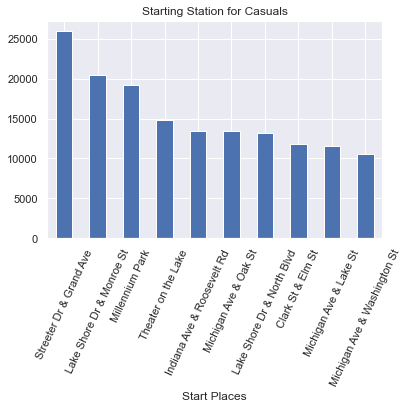

In [109]:
top_10_casual_places = casual_['start_station_name'].value_counts().head(10).plot(kind='bar',rot = 65,title = 'Starting Station for Casuals',xlabel = 'Start Places')
plt.show()

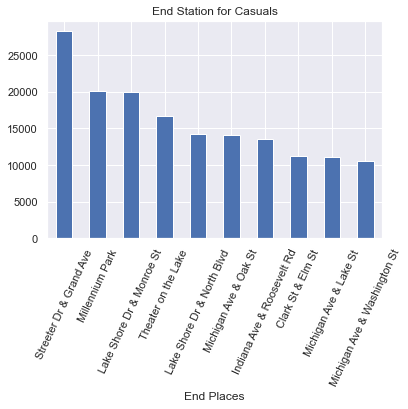

In [110]:
top_10_casual_places = casual_['end_station_name'].value_counts().head(10).plot(kind='bar',rot = 65,title = 'End Station for Casuals',xlabel = 'End Places')
plt.show()

#### I primarily visualized casuals only since we need to focus on how to get casuals to become members 

# From the overall analysis I would like to give the following suggestions in order to convert casual riders into members of the organization.
#### 1. The casual riders love to ride bikes. The duration of their ride is much more than that of current members so there is ample of room to attract them for membership. It would be highly beneficial if they are given some incentives or some promotional offer to become a member.
#### 2. From the above visualizations I would like to suggest that we need to make marketing strategy during weekends where the ride consumption is more by casual riders and we need to target the above top ten places.
#### 3. I feel that the member's ride length is less than casuals is because they may be using the bikes for short distance commuting purposes or going to work. Whereas casual riders are using the facility for more leisure purposes. So keeping this in mind organization should make a marketing strategy which will be highly appealing for casuals.
#### 4. Since February till September is the busiest period of ride consumption I would suggest it would be the perfecct time for marketing practices.